# COMP 551 Assignment 3 - Image Pre-Processing

In [1]:
import cv2
import numpy as np
import imutils # this package will have to be referenced, took it from a blog
import matplotlib.pyplot as plt
import pandas as pd

train_labels = pd.read_csv('train_max_y.csv')
train_images = pd.read_pickle('train_max_x')
test_images = pd.read_pickle('test_max_x')

print(train_labels.head())
print(train_images.shape)
print(test_images.shape)

   Id  Label
0   0      6
1   1      7
2   2      2
3   3      9
4   4      7
(50000, 128, 128)
(10000, 128, 128)


In [2]:
##### DIGIT EXTRACTION PARAMETERS #####
# can be tweaked to optimize digit extraction from image
threshold = 200    # binary thresholding image (keep white (255) digits, set everything else to black)
digit_width = 12   # number of pixels wide a contour box must be to be detected as a digit
digit_height = 12  # number of pixels tall a contour box must be to be detected as a digit

##### STORAGE VARIABLES #####
allDigitWindows = []   # holds the windows containing digits (in black & white)

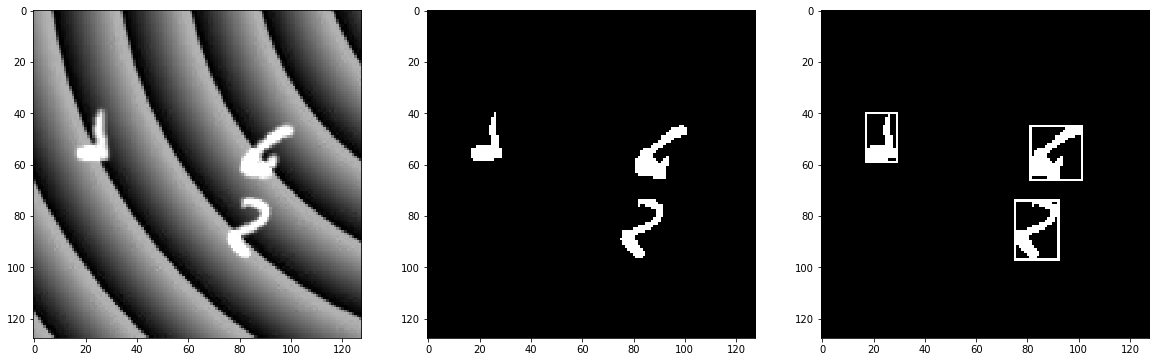

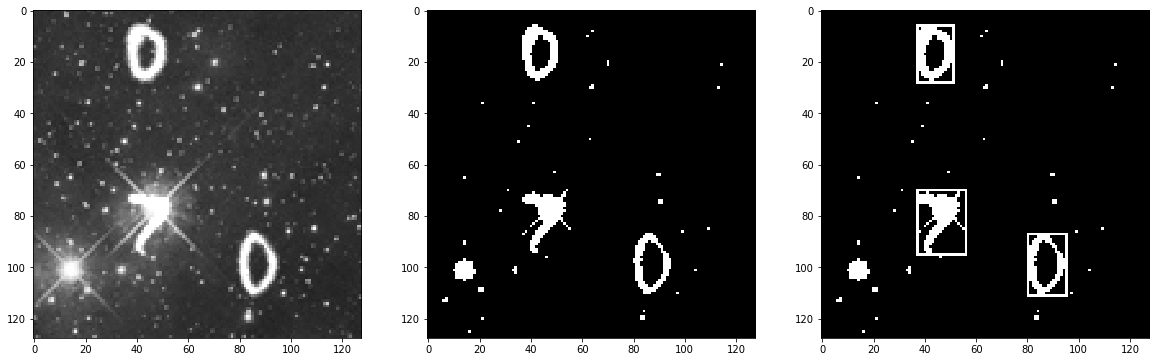

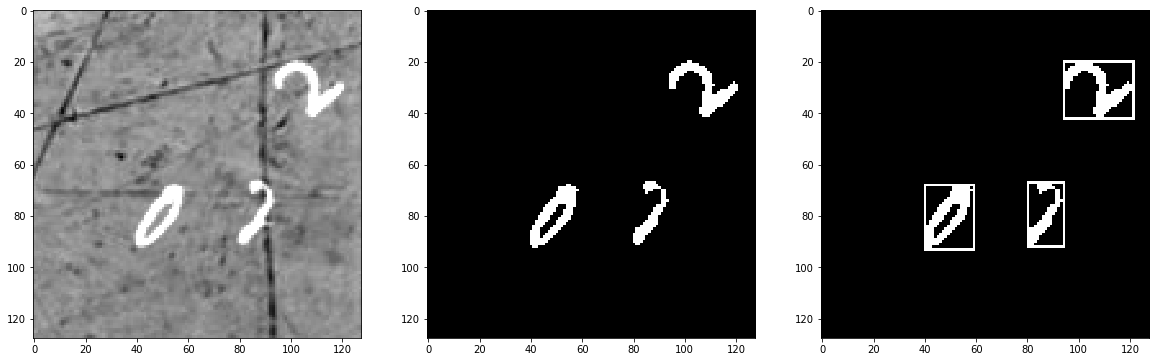

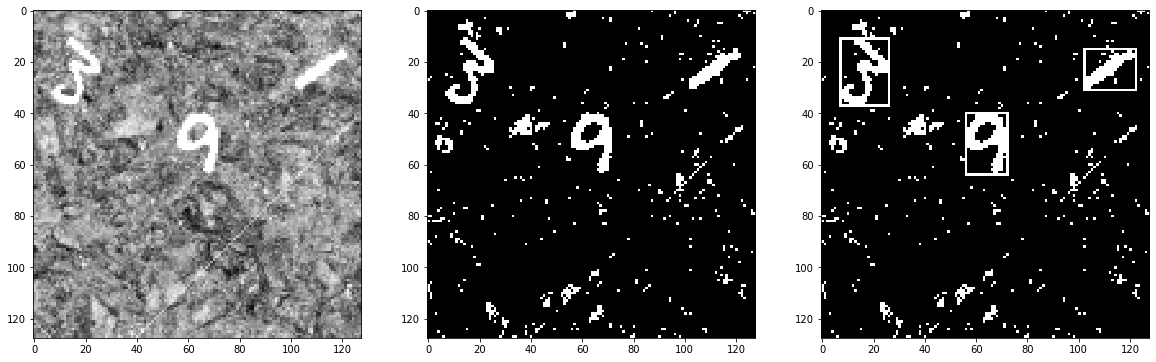

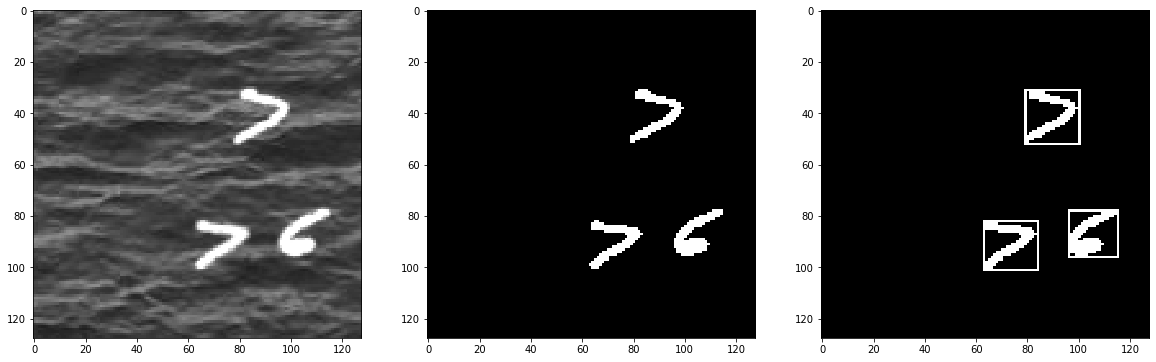

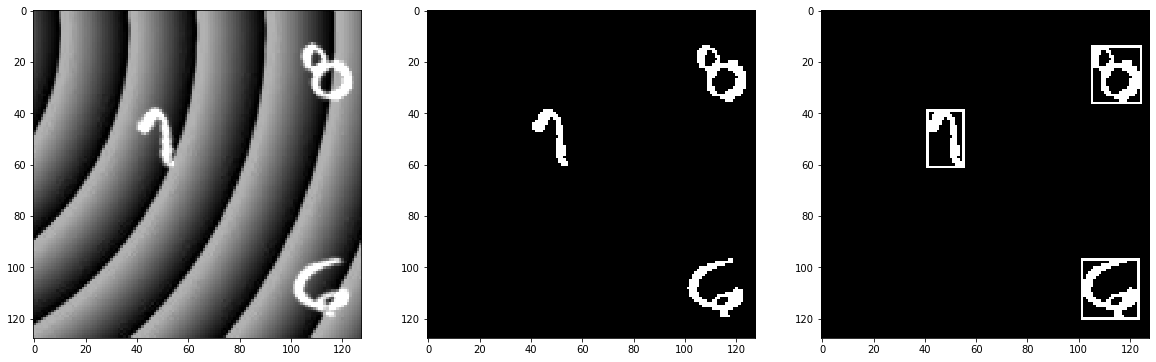

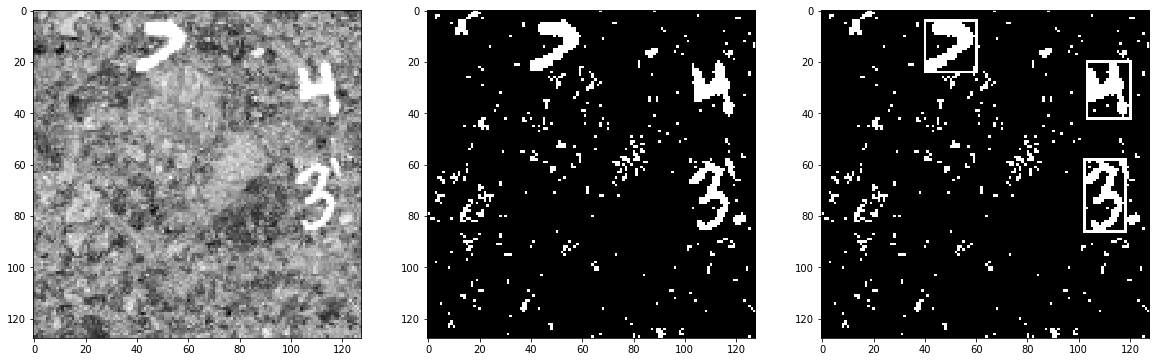

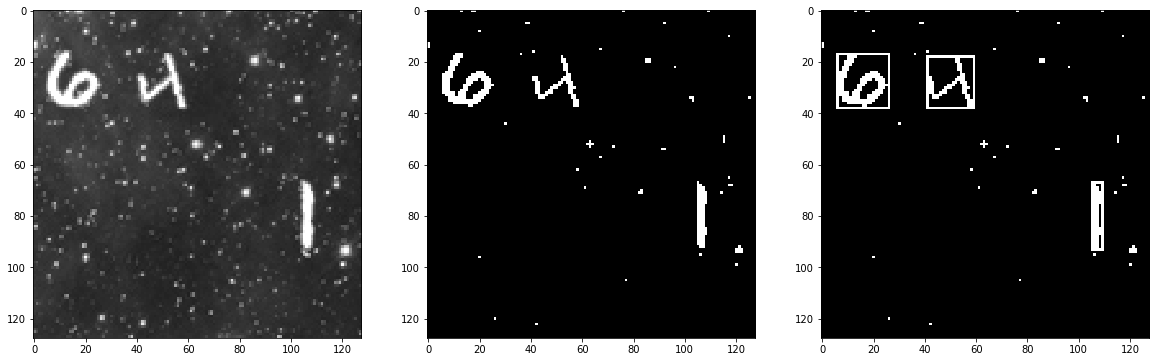

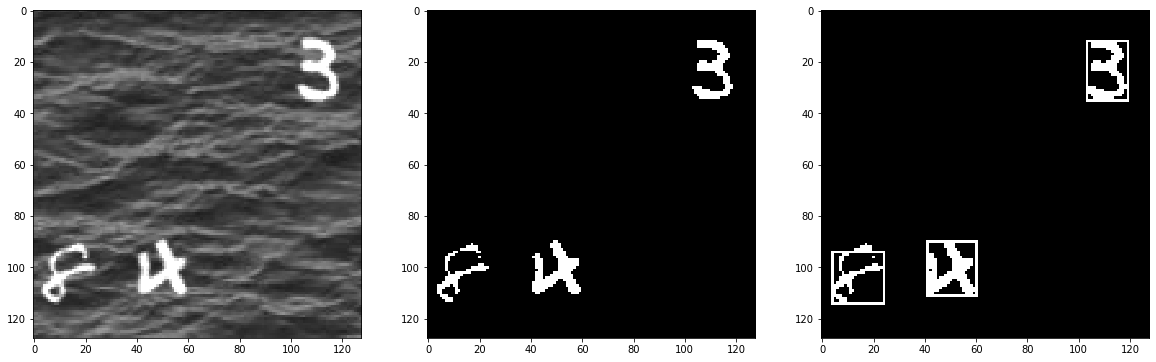

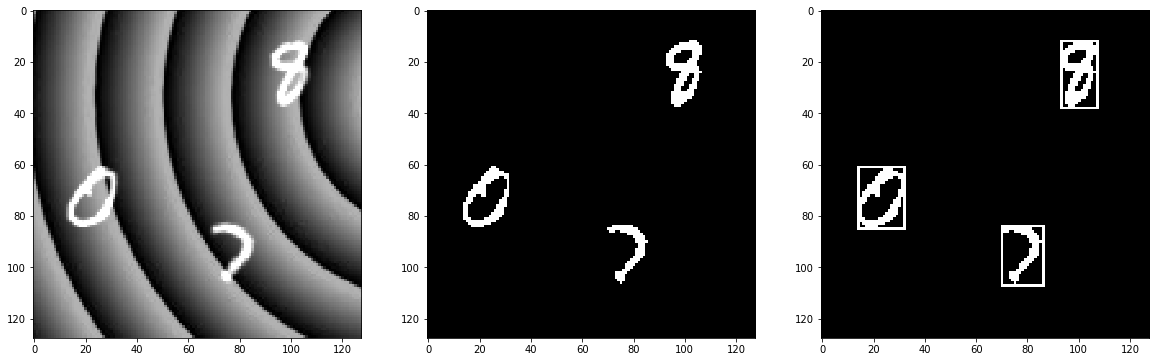

In [3]:
for img in train_images[:10]:
    # threshold the image to only black (non-digit) or white (digit)
    ret, t_img = cv2.threshold(img.copy(), threshold, 255, cv2.THRESH_BINARY)
    digitBoxes = t_img.copy()
    
    # find contours in the thresholded image
    contours = cv2.findContours(t_img.copy().astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # loop over the candidates for digits, determine which are actually digits, then save them
    digitWindows = []
    for c in imutils.grab_contours(contours):
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)

        # if the contour is sufficiently large, decide that it is a digit
        if w >= digit_width or h >= digit_height:
            digitWindows.append(t_img[y:y+h, x:x+w])
            cv2.rectangle(digitBoxes, (x, y), (x + w, y + h), (255, 0, 0), 1)

    # add digitContours to array
    allDigitWindows.append(digitWindows)
    
    # display progression
    plt.figure(figsize = (20,20))
    plt.subplot(131), plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(132), plt.imshow(t_img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(133), plt.imshow(digitBoxes, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [4]:
# determine performance of digit identifier
count = 0
average = 0
for img in allDigitWindows:
    if len(img) != 3:
        count += 1
    average += len(img)
average /= len(allDigitWindows)
print("number of images with != 3 identified digits: " + str(count))
print("average number of digits identified per image: " + str(average))

number of images with != 3 identified digits: 0
average number of digits identified per image: 3.0
